# Time series graphics

## Time plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-notebook')

In [5]:
melsyd = pd.read_csv('data/melsyd.csv', index_col=0)
melsyd.head()

,First.Class,Business.Class,Economy.Class
1,1.912,NaN,20.167
2,1.848,NaN,20.161
3,1.856,NaN,19.993
4,2.142,NaN,20.986
5,2.118,NaN,20.497


In [6]:
pd.date_range('07/01/1991', periods=204, freq='M')

DatetimeIndex(['1991-07-31', '1991-08-31', '1991-09-30', '1991-10-31',
               '1991-11-30', '1991-12-31', '1992-01-31', '1992-02-29',
               '1992-03-31', '1992-04-30',
               ...
               '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
               '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30'],
              dtype='datetime64[ns]', length=204, freq='M')

In [15]:
a10 = pd.read_csv('data/a10.csv' )
a10 = a10.set_index(pd.date_range('07/01/1991', periods=204, freq='M'))
del(a10['Unnamed: 0'])
a10.to_csv('data/a10p.csv')

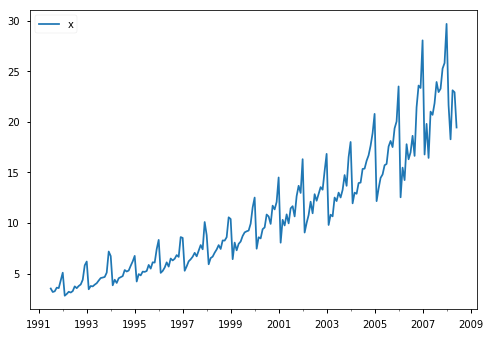

In [16]:
a10.plot(y='x')

In [22]:
def autoplot(df, *ys):
    fig, ax = plt.subplots()
    for y in ys:
        df.plot(y=y, label=y, ax=ax)

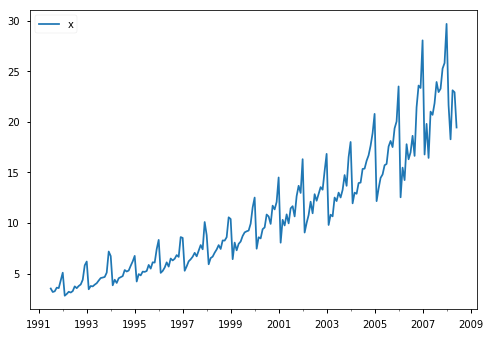

In [23]:
autoplot(a10, 'x')

In [31]:

melsyd = melsyd.set_index(pd.date_range(start='1987-06-28', freq='W', periods=283))
melsyd.head()

,First.Class,Business.Class,Economy.Class
1987-06-28,1.912,NaN,20.167
1987-07-05,1.848,NaN,20.161
1987-07-12,1.856,NaN,19.993
1987-07-19,2.142,NaN,20.986
1987-07-26,2.118,NaN,20.497


In [33]:
melsyd.to_csv('data/melsydp.csv')

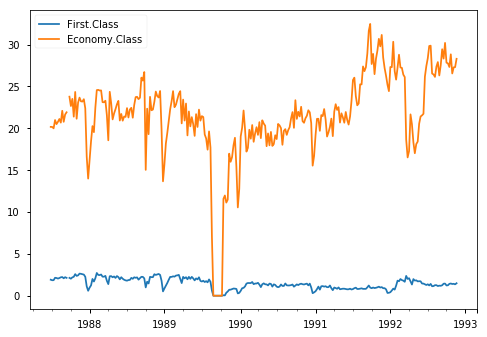

In [34]:
autoplot(melsyd, 'First.Class', 'Economy.Class')

## Example of ggseasonplot

In [49]:
a10.loc[:,'year'] = a10.index.year
a10.loc[:,'month'] = a10.index.month

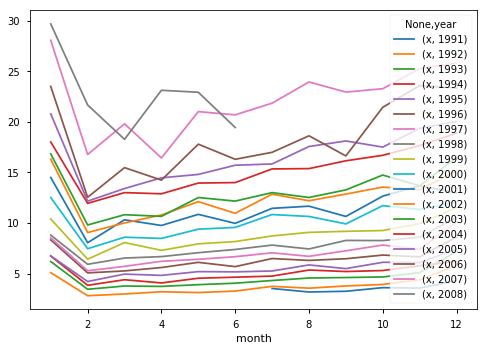

In [51]:
a10.set_index(['year', 'month']).unstack('year').plot()

## Example of subseries plot

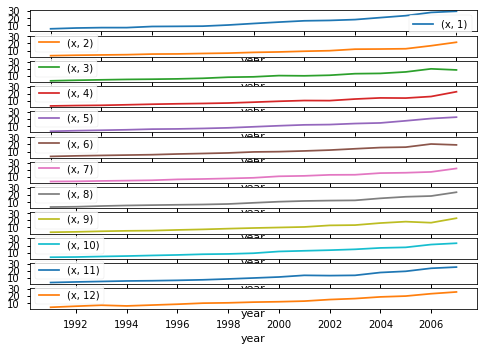

In [86]:
_ = a10.set_index(['year', 'month']).unstack('month').plot( sharey=True, sharex=False, subplots=True)

In [ ]:
def subseriesplot(df, by):
    l = len(df[by])
    fig, axs = plt.subplots(nrows=1, ncols=l)
    for ax in axs:
        plt.plot(df[])

In [105]:
a10.set_index(['year', 'month']).unstack('month')['x',12]

year
1991     4.306371
1992     5.810549
1993     7.179962
1994     6.204593
1995     7.416598
1996     8.606937
1997    10.096233
1998    10.558939
1999    11.532974
2000    12.079132
2001    12.965735
2002    15.134918
2003    16.503966
2004    18.869325
2005    20.031291
2006    23.334206
2007    25.806090
2008          NaN
Name: (x, 12), dtype: float64

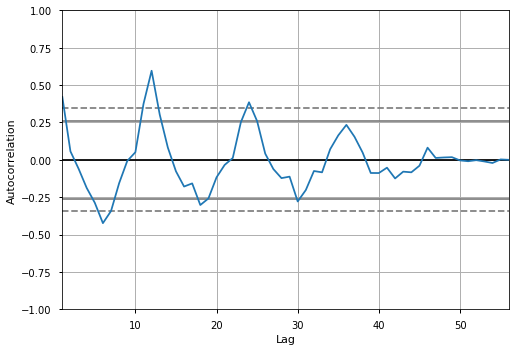

In [106]:
pd.plotting.autocorrelation_plot(beer.x, )

In [107]:
from statsmodels.tsa.stattools import acf

C:\Users\430014183\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


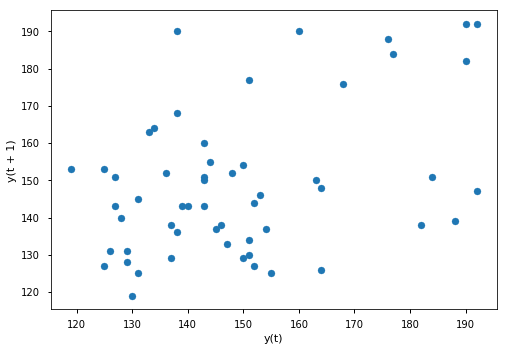

In [110]:
pd.tools.plotting.lag_plot(beer.x)

In [67]:
beer = pd.read_csv('data/beer.csv', index_col=0)
beer.set_index(pd.date_range('1991-01-01', freq='M',periods=56), inplace=True)
beer.head()

,x
1991-01-31,164
1991-02-28,148
1991-03-31,152
1991-04-30,144
1991-05-31,155


In [68]:
beer.tail()

,x
1995-04-30,127
1995-05-31,151
1995-06-30,130
1995-07-31,119
1995-08-31,153


In [69]:
beer.to_csv('data/beerp.csv')

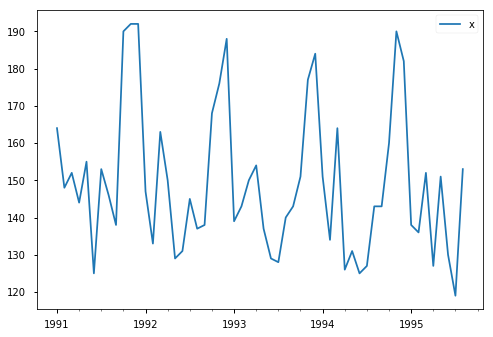

In [70]:
beer.plot()

In [71]:
beer.index.quarter

Int64Index([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
            4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3,
            3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3],
           dtype='int64')

In [73]:
beer['lag1'] = beer.x.shift(1)
beer['lag2'] = beer.x.shift(2)
beer['lag3'] = beer.x.shift(3)
beer['lag4'] = beer.x.shift(4)

In [111]:
beer.head()

,x,lag1,lag2,lag3,lag4
1991-01-31,164,NaN,NaN,NaN,NaN
1991-02-28,148,164.0,NaN,NaN,NaN
1991-03-31,152,148.0,164.0,NaN,NaN
1991-04-30,144,152.0,148.0,164.0,NaN
1991-05-31,155,144.0,152.0,148.0,164.0


In [123]:
beer.head()

,x,lag1,lag2,lag3,lag4
1991-01-31,164,NaN,NaN,NaN,NaN
1991-02-28,148,164.0,NaN,NaN,NaN
1991-03-31,152,148.0,164.0,NaN,NaN
1991-04-30,144,152.0,148.0,164.0,NaN
1991-05-31,155,144.0,152.0,148.0,164.0


In [127]:
bear = beer.groupby([beer.index.year, beer.index.quarter]).sum()
# ax = bear[bear.index.quarter == 1].plot( y='lag1',  color='red')
# ax = bear[bear.index.quarter == 2].plot( y='lag1',  ax=ax, color='blue')
# ax = bear[bear.index.quarter == 3].plot( y='lag1', ax=ax, color='green')
# ax = bear[bear.index.quarter == 4].plot( y='lag1',  ax=ax, color='purple')

In [128]:
bear.head()

x   lag1   lag2   lag3   lag4
1991 1  464  312.0  164.0    0.0    0.0
     2  424  451.0  444.0  464.0  312.0
     3  437  424.0  433.0  424.0  451.0
     4  574  520.0  474.0  437.0  424.0
1992 1  443  472.0  531.0  574.0  520.0

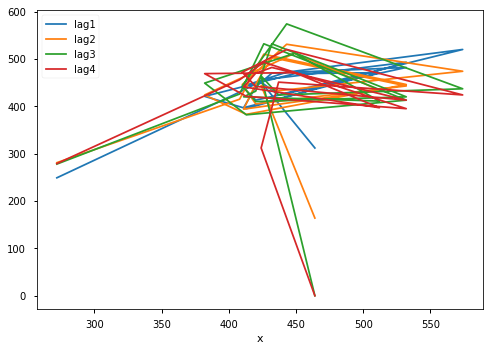

In [137]:
bear.plot(x='x')

In [141]:
elecdaily = pd.read_csv('data/elecdaily.csv', index_col=0)
elecdaily.head()

,Demand,WorkDay,Temperature
1,174.896295,0,26.0
2,188.590935,1,23.0
3,188.916891,1,22.2
4,173.814244,0,20.3
5,169.515175,0,26.1


In [143]:
from statsmodels.graphics import tsaplots

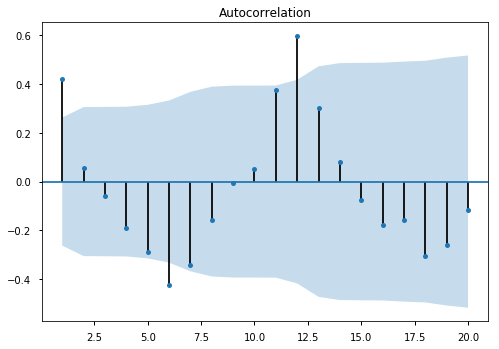

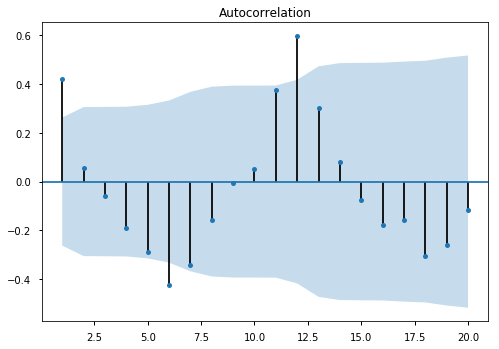

In [176]:
tsaplots.plot_acf(beer.x, lags=20, zero=False)

In [62]:
from statsmodels.tsa import tsatools

In [147]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\430014183\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


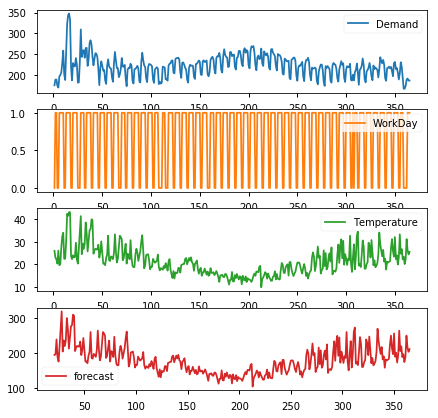

In [175]:
fig, ax = plt.subplots(figsize=(7,7))
_ = elecdaily.plot(subplots=True, ax=ax)

In [150]:
daily20 = elecdaily.head(20)
daily20.head()

,Demand,WorkDay,Temperature
1,174.896295,0,26.0
2,188.590935,1,23.0
3,188.916891,1,22.2
4,173.814244,0,20.3
5,169.515175,0,26.1


In [153]:
model = ols('Demand ~ Temperature', data=daily20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.88e-09
Time:                        14:33:31   Log-Likelihood:                -89.149
No. Observations:                  20   AIC:                             182.3
Df Residuals:                      18   BIC:                             184.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.2117     17.992      2.179      0.043       1.413      77.011
Temperature     6.7572      0.611     11.052      0.000       5.473       8.042
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.468
Skew:                          -0.637   Prob(JB):                        0.480
Kurtosis:                       2.624   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

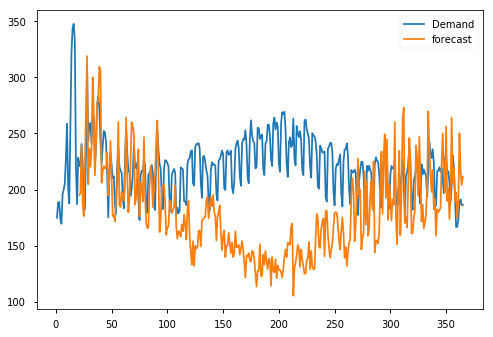

In [170]:
fig, ax = plt.subplots()
elecdaily.plot(y=['Demand', 'forecast'], ax=ax)


In [168]:
elecdaily['forecast'] = (model.predict(elecdaily.Temperature[20:]))

In [169]:
elecdaily

,Demand,WorkDay,Temperature,forecast
1,174.896295,0,26.0,NaN
2,188.590935,1,23.0,NaN
3,188.916891,1,22.2,NaN
4,173.814244,0,20.3,NaN
5,169.515175,0,26.1,NaN
6,195.728795,1,19.6,NaN
7,199.902888,1,20.0,NaN
8,205.337529,1,27.4,NaN
9,228.078204,1,32.4,NaN
10,258.598387,1,34.0,NaN
